In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/content/5m Sales Records.csv")
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


In [3]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.092840e+05,109284.000000,109284.000000,109284.000000,1.092840e+05,1.092840e+05,1.092840e+05
mean,5.517080e+08,4987.306925,266.440754,187.845238,1.329865e+06,9.375425e+05,3.923229e+05
std,2.600520e+08,2883.395625,217.181974,175.784737,1.471188e+06,1.150409e+06,3.796687e+05
min,1.000265e+08,1.000000,9.330000,6.920000,9.330000e+00,6.920000e+00,2.410000e+00
25%,3.256380e+08,2494.000000,81.730000,56.670000,2.764880e+05,1.611580e+05,9.396000e+04
50%,5.522484e+08,4977.000000,205.700000,117.110000,7.850013e+05,4.678759e+05,2.805816e+05
75%,7.777507e+08,7476.000000,437.200000,364.690000,1.823061e+06,1.197762e+06,5.661493e+05
max,9.999935e+08,10000.000000,668.270000,524.960000,6.682032e+06,5.249600e+06,1.738700e+06


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109284 entries, 0 to 109283
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          109284 non-null  object 
 1   Country         109284 non-null  object 
 2   Item Type       109284 non-null  object 
 3   Sales Channel   109284 non-null  object 
 4   Order Priority  109284 non-null  object 
 5   Order Date      109284 non-null  object 
 6   Order ID        109284 non-null  int64  
 7   Ship Date       109284 non-null  object 
 8   Units Sold      109284 non-null  int64  
 9   Unit Price      109284 non-null  float64
 10  Unit Cost       109284 non-null  float64
 11  Total Revenue   109284 non-null  float64
 12  Total Cost      109284 non-null  float64
 13  Total Profit    109284 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.7+ MB


In [6]:
data["Region"].head()

,Region
0,Australia and Oceania
1,Europe
2,North America
3,Europe
4,Middle East and North Africa


In [7]:
data["Region"] = data["Region"].astype(str)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109284 entries, 0 to 109283
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          109284 non-null  object 
 1   Country         109284 non-null  object 
 2   Item Type       109284 non-null  object 
 3   Sales Channel   109284 non-null  object 
 4   Order Priority  109284 non-null  object 
 5   Order Date      109284 non-null  object 
 6   Order ID        109284 non-null  int64  
 7   Ship Date       109284 non-null  object 
 8   Units Sold      109284 non-null  int64  
 9   Unit Price      109284 non-null  float64
 10  Unit Cost       109284 non-null  float64
 11  Total Revenue   109284 non-null  float64
 12  Total Cost      109284 non-null  float64
 13  Total Profit    109284 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.7+ MB


In [12]:
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [13]:
data["Ship Date"] = pd.to_datetime(data["Ship Date"])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109284 entries, 0 to 109283
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          109284 non-null  object        
 1   Country         109284 non-null  object        
 2   Item Type       109284 non-null  object        
 3   Sales Channel   109284 non-null  object        
 4   Order Priority  109284 non-null  object        
 5   Order Date      109284 non-null  datetime64[ns]
 6   Order ID        109284 non-null  int64         
 7   Ship Date       109284 non-null  datetime64[ns]
 8   Units Sold      109284 non-null  int64         
 9   Unit Price      109284 non-null  float64       
 10  Unit Cost       109284 non-null  float64       
 11  Total Revenue   109284 non-null  float64       
 12  Total Cost      109284 non-null  float64       
 13  Total Profit    109284 non-null  float64       
dtypes: datetime64[ns](2), float64(5), in

In [18]:
a = data.groupby("Region")["Total Revenue"].sum().reset_index()
print(a)

                              Region  Total Revenue
0                               Asia   2.144338e+10
1              Australia and Oceania   1.170556e+10
2  Central America and the Caribbean   1.550625e+10
3                             Europe   3.825572e+10
4       Middle East and North Africa   1.792996e+10
5                      North America   3.066411e+09
6                 Sub-Saharan Africa   3.742573e+10


In [19]:
a = pd.DataFrame(a)
a

,Region,Total Revenue
0,Asia,2.144338e+10
1,Australia and Oceania,1.170556e+10
2,Central America and the Caribbean,1.550625e+10
3,Europe,3.825572e+10
4,Middle East and North Africa,1.792996e+10
5,North America,3.066411e+09
6,Sub-Saharan Africa,3.742573e+10


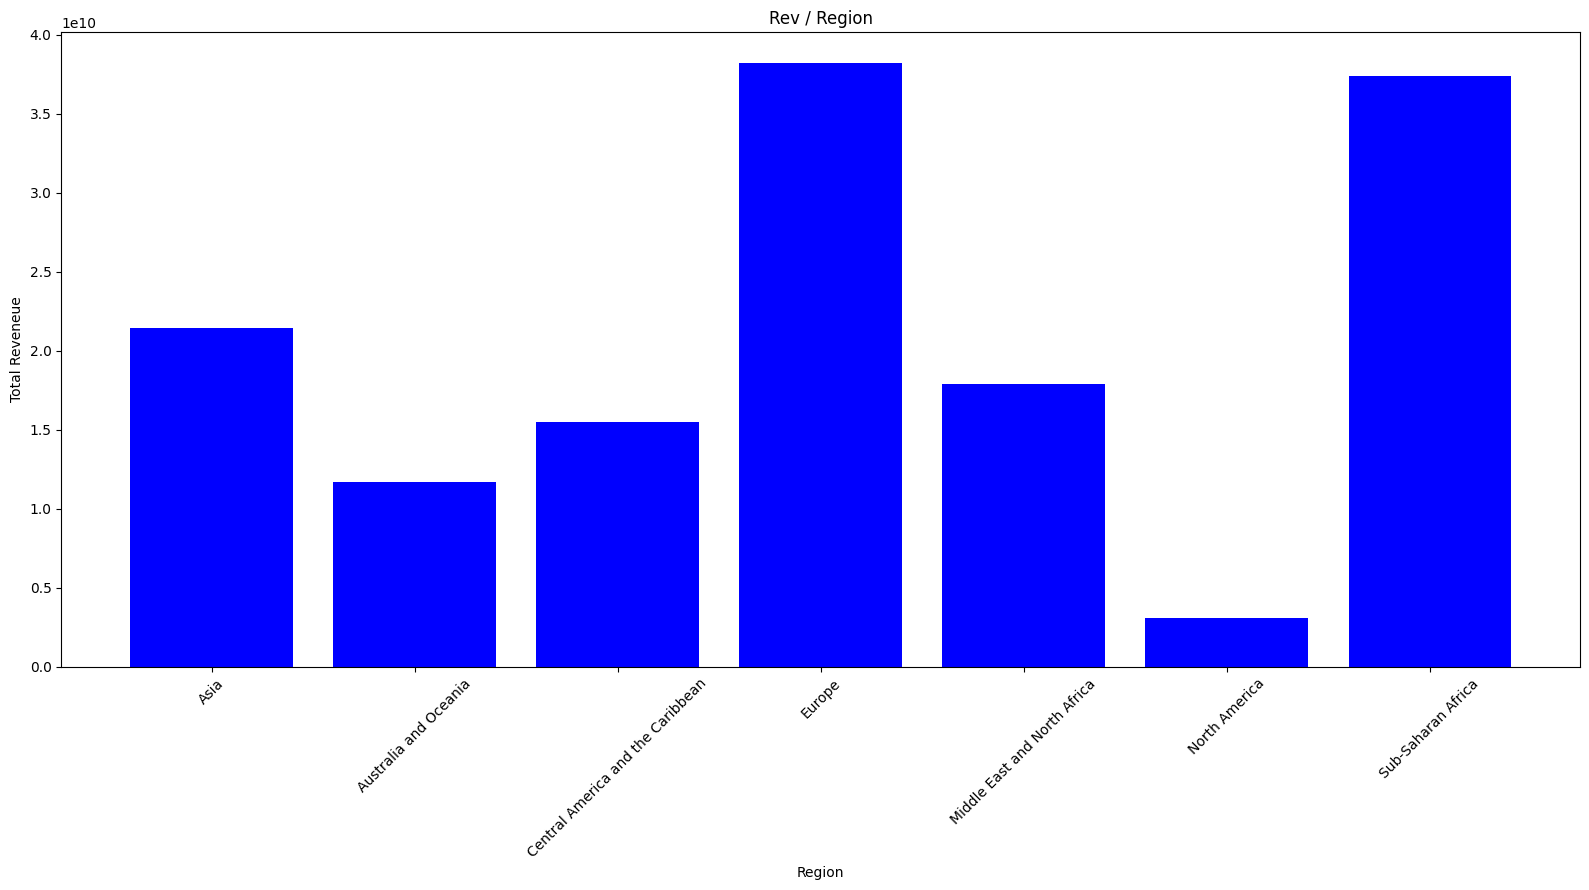

In [24]:
plt.figure(figsize=(16,9))
plt.bar(a['Region'], a['Total Revenue'], color="blue")
plt.xlabel("Region")
plt.ylabel("Total Reveneue")
plt.title("Rev / Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()